<a href="https://colab.research.google.com/github/Bambani2003/Data_Science_Projects/blob/main/HeartDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from sklearn.linear_model import LogisticRegression

In [2]:
# Loading into dataframe

df = pd.read_csv("/content/HeartDisease.csv")
pd.set_option('display.max_columns', None)
print(df.head())
print(df.info())

   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

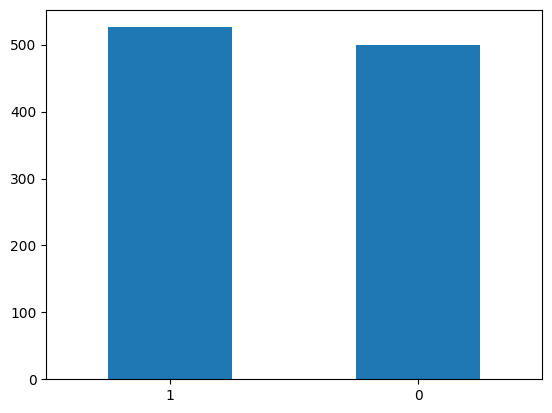

In [3]:
# Number of people with and without heart diseases

df["target"].value_counts().plot(kind="bar")                # Target: 1 = Heart disease
plt.tick_params(labelrotation=0)
plt.show()

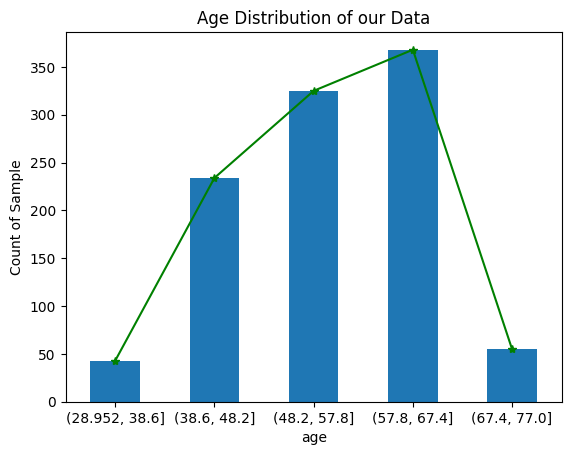

In [4]:
# Number of heart diseases in age range (29, 77, 9.6)

df.age.groupby(pd.cut(df.age, 5)).count().plot(kind="bar")
df.age.groupby(pd.cut(df.age, 5)).count().plot(kind="line", marker='*', color="Green")
plt.tick_params(labelrotation=0)
plt.title("Age Distribution of our Data")
plt.ylabel("Count of Sample")
plt.show()

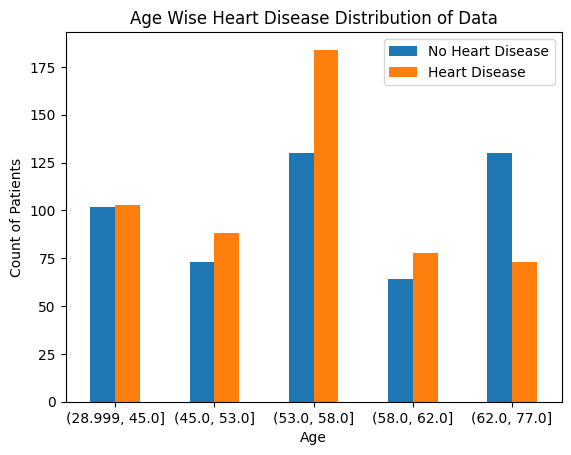

In [5]:
# Number of people who have heart diseases and those who don't

pd.crosstab(df.age, df.target).groupby(pd.qcut(df.age, 5)).sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Count of Patients")
plt.title("Age Wise Heart Disease Distribution of Data")
plt.show()

In [6]:
# Converting word data to figures

df["sex"].replace({"Male" : 1,
                   "Female" : 0}, inplace=True)
df["chest_pain_type"].replace({"Typical angina" : 1,
                                  "Atypical angina" : 2,
                                  "Non-anginal pain" : 3,
                                  "Asymptomatic" : 4}, inplace=True)
df["fasting_blood_sugar"].replace({"Greater than 120 mg/ml" : 1,
                                   "Lower than 120 mg/ml" : 0}, inplace=True)
df["rest_ecg"].replace({"Normal" : 0,
                       "ST-T wave abnormality" : 1,
                       "Left ventricular hypertrophy" : 2}, inplace=True)
df["exercise_induced_angina"].replace({"Yes" : 1,
                                       "No" : 0}, inplace=True)
df["slope"].replace({"Upsloping" : 1,
                     "Flat" : 2,
                     "Downsloping" : 3}, inplace=True)
df["vessels_colored_by_flourosopy"].replace({"Zero" : 0,
                                             "One" : 1,
                                             "Two" : 2,
                                             "Three" : 3,
                                             "Four" : 4}, inplace=True)
df["thalassemia"].replace({"Normal" : 3,
                        "Fixed Defect" : 6,
                        "Reversable Defect" : 7,
                          "No" : 0}, inplace=True)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,1,125,212,0,1,168,0,1.0,3,2,7,0
1,53,1,1,140,203,1,0,155,1,3.1,1,0,7,0
2,70,1,1,145,174,0,1,125,1,2.6,1,0,7,0
3,61,1,1,148,203,0,1,161,0,0.0,3,1,7,0
4,62,0,1,138,294,1,1,106,0,1.9,2,3,6,0


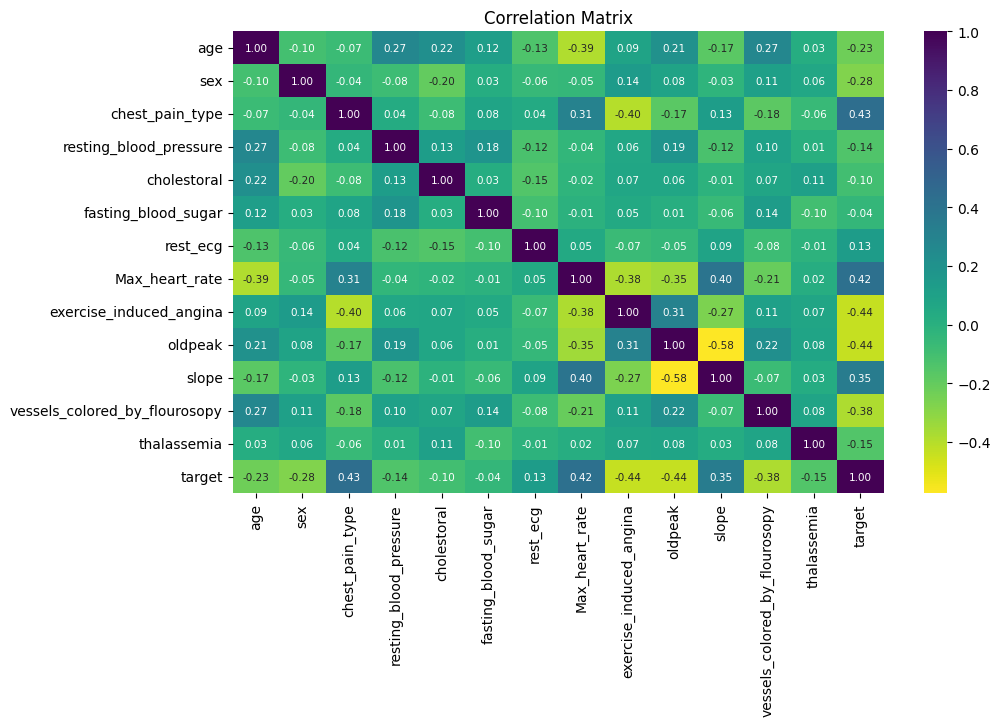

In [7]:
# Table showing correlation between every attribute

fig, ax = plt.subplots(figsize=(10.5,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis_r', fmt='.2f', annot_kws={"size": 7.5})
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Load data

data_x = df.values
x_train = np.delete(data_x, 13, axis=1)
print(x_train)
data_y = df.iloc[:, -1]
y_train = data_y.values
print(y_train)

[[52.  1.  1. ...  3.  2.  7.]
 [53.  1.  1. ...  1.  0.  7.]
 [70.  1.  1. ...  1.  0.  7.]
 ...
 [47.  1.  1. ...  2.  1.  6.]
 [50.  0.  1. ...  3.  0.  6.]
 [54.  1.  1. ...  2.  1.  7.]]
[0 0 0 ... 0 1 0]


In [9]:
# Logistic regression

LR_model = LogisticRegression(max_iter=5000)
LR_model.fit(x_train, y_train)
print(f"Accuracy = {100*LR_model.score(x_train, y_train)}%")

Accuracy = 84.39024390243902%


In [10]:
# Training the model using Neural Network

tf.random.set_seed(69)
model = Sequential(
    [
        Dense(13, activation='relu'),
        Dense(30, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]
)
model.compile(optimizer= 'adam', loss = tf.keras.losses.BinaryCrossentropy())
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
33/33 [==============================] - 2s 4ms/step - loss: 0.7688
Epoch 2/500
33/33 [==============================] - 0s 6ms/step - loss: 0.6142
Epoch 3/500
33/33 [==============================] - 0s 5ms/step - loss: 0.5940
Epoch 4/500
33/33 [==============================] - 0s 6ms/step - loss: 0.5982
Epoch 5/500
33/33 [==============================] - 0s 8ms/step - loss: 0.6090
Epoch 6/500
33/33 [==============================] - 0s 8ms/step - loss: 0.6058
Epoch 7/500
33/33 [==============================] - 0s 6ms/step - loss: 0.5961
Epoch 8/500
33/33 [==============================] - 0s 5ms/step - loss: 0.6119
Epoch 9/500
33/33 [==============================] - 0s 8ms/step - loss: 0.5975
Epoch 10/500
33/33 [==============================] - 0s 7ms/step - loss: 0.6052
Epoch 11/500
33/33 [==============================] - 0s 7ms/step - loss: 0.5586
Epoch 12/500
33/33 [==============================] - 0s 10ms/step - loss: 0.5785
Epoch 13/500
33/33 [================

In [11]:
# Testing and predictions

y_test = model.predict(x_train)
for i in range (len(y_test)):
    if y_test[i]<0.5:
        y_test[i]=0
    else:
        y_test[i]=1
diff = []
for i in range (len(y_train)):
    if y_train[i]!=y_test[i]:
        diff.append(x_train[i])
print(f"Only {len(diff)} were not predicted correctly out of {len(df)} examples.")

Only 98 were not predicted correctly out of 1025 examples.
